# Total Reflectance from Human Skin

**Scott Prahl**

**Nov 2021**

**version 1**

Test the ability to grab an arbitrary sample from the 100 available.

The paper is available at

   [Reference Data Set of Human Skin Reflectance](https://doi.org/10.6028/jres.122.026)

The data is available at

   [The Data Set](https://doi.org/10.18434/M38597)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import iadpython.nist

%config InlineBackend.figure_format='retina'

We have (at least) two definitions for melanin in the literature.  The first is by Dawson and is
$$
m_\mathrm{Dawson} = 1.5 + 100 \cdot \log \frac{R(\mathrm{700nm})}{R(\mathrm{650nm})}
$$
and that of Kollias who fits the $-log(R)$ spectra between 650nm and 750nm.

In [ ]:
def dawson_melanin(λ, R):
    """
    Dawson definition of melanin.

    metric =

    Args:
        λ: wavelength [nm]
        R: total reflectance value [-]

    Returns:
        Dawson metric for melanin.
    """
    L = -np.log(R)

    j700 = np.abs(λ - 700).argmin()
    j650 = np.abs(λ - 650).argmin()

    M = 100 * (L[j650] - L[j700] + 0.015)

    return M


def kollias_melanin(λ, R):
    """
    Kollias definition of melanin.

    Args:
        λ: wavelength [nm]
        R: total reflectance value [-]

    Returns:
        Kollias metric for melanin.
    """
    L = -np.log(R)

    j720 = np.abs(λ - 700).argmin()
    j620 = np.abs(λ - 650).argmin()

    C2, C1 = np.polyfit(λ[j620:j720], L[j620:j720], 1)
    #    linear_model_fn=np.poly1d([C2,C1])
    #    fitted = linear_model_fn(λ)
    #    print(linear_model)

    #    plt.xlim(400,800)
    #    plt.plot(λ,L)
    #    plt.plot(λ,fitted)
    #    plt.show()
    return C1, C2

<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
/var/folders/bk/7msms9wj50nfy_l1gjzfyx480000gn/T/ipykernel_47977/1116322481.py:7: SyntaxWarning: invalid escape sequence '\c'
  """


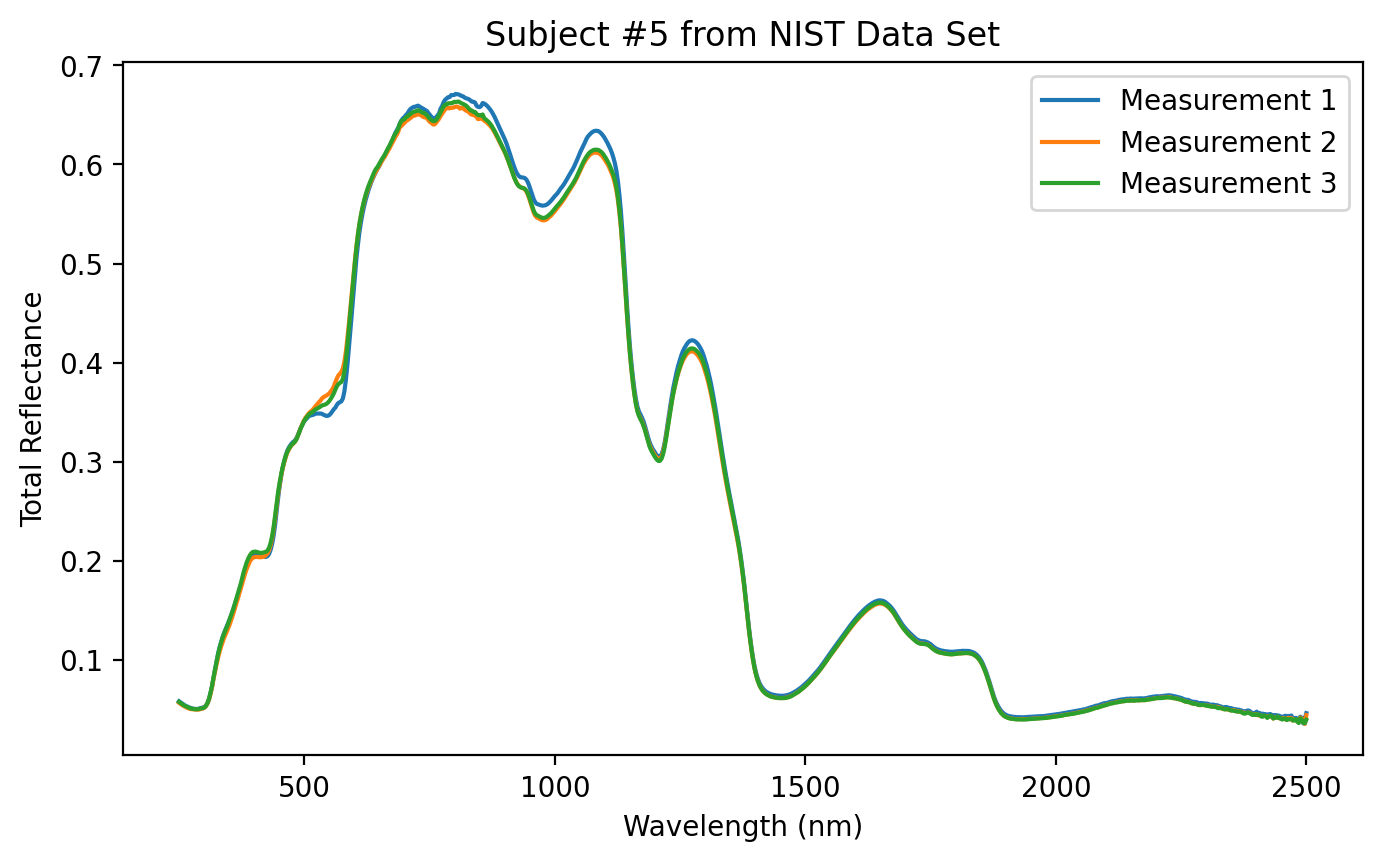

In [30]:
subject_number = 5

λ, R1, R2, R3, _ = iadpython.nist.subject_reflectances(subject_number)

plt.figure(figsize=(8, 4.5))
plt.plot(λ, R1, label="Measurement 1")
plt.plot(λ, R2, label="Measurement 2")
plt.plot(λ, R3, label="Measurement 3")

plt.xlabel("Wavelength (nm)")
plt.ylabel("Total Reflectance")
plt.title("Subject #%d from NIST Data Set" % subject_number)
plt.legend()
plt.show()

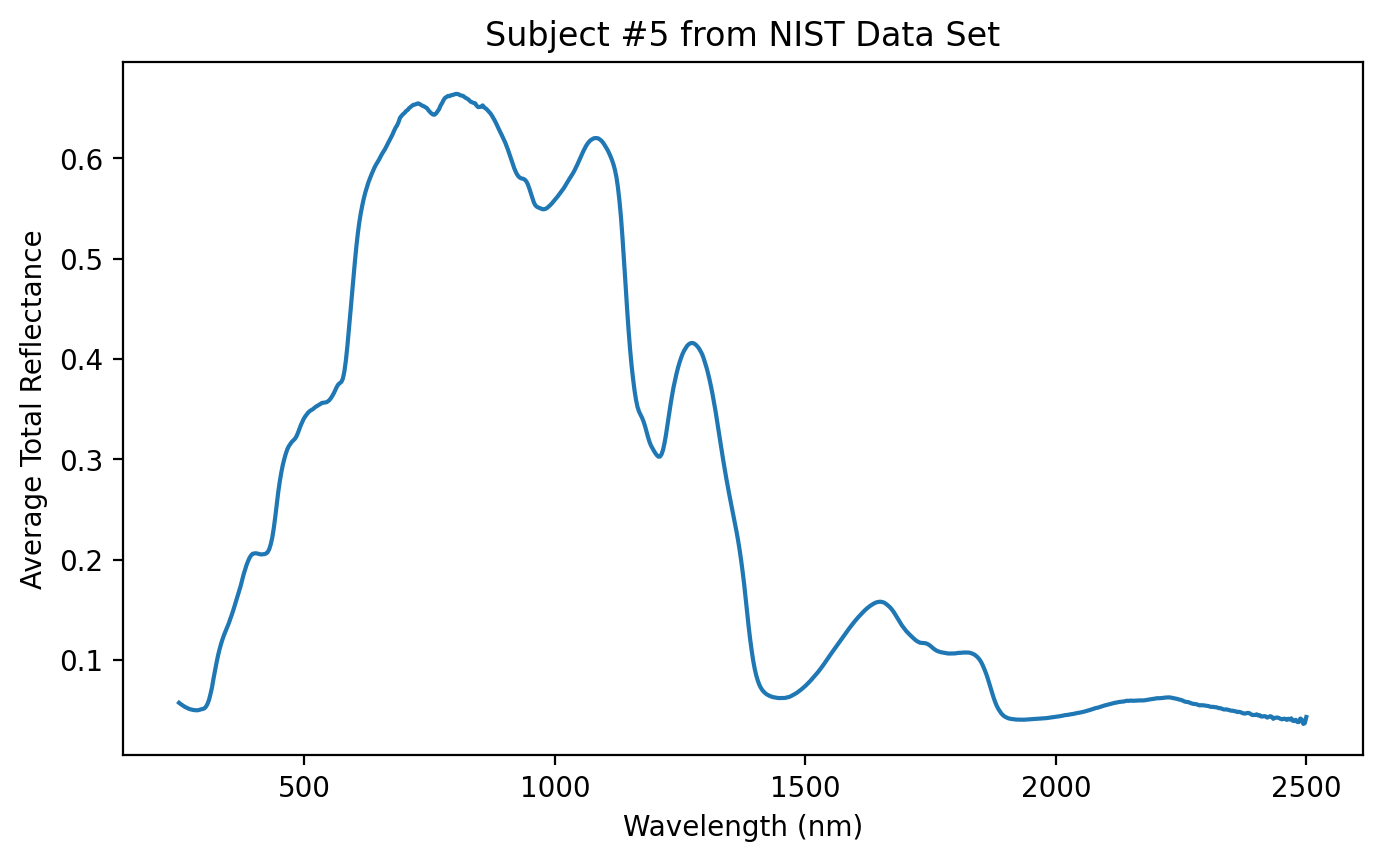

0.0573


In [31]:
subject_number = 5

λ, R = iadpython.nist.subject_average_reflectance(subject_number)
plt.plot(λ, R)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Average Total Reflectance")
plt.title("Subject #%d from NIST Data Set" % subject_number)
plt.show()

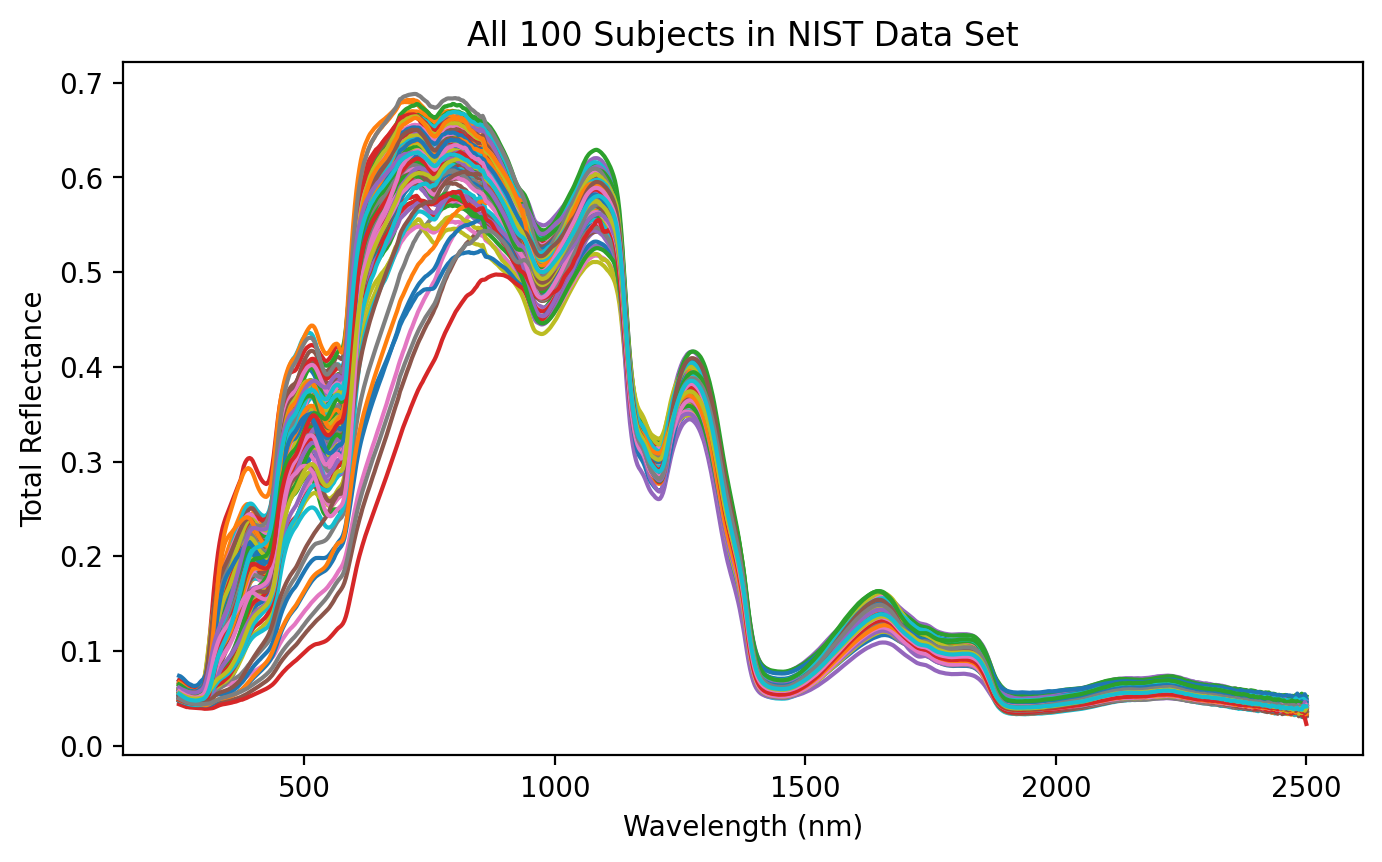

In [33]:
λ, R = iadpython.nist.all_average_reflectances()

plt.figure(figsize=(8, 4.5))
for i in range(100):
    plt.plot(λ, R[:, i])

plt.xlabel("Wavelength (nm)")
plt.ylabel("Total Reflectance")
plt.title("All 100 Subjects in NIST Data Set")
plt.show()

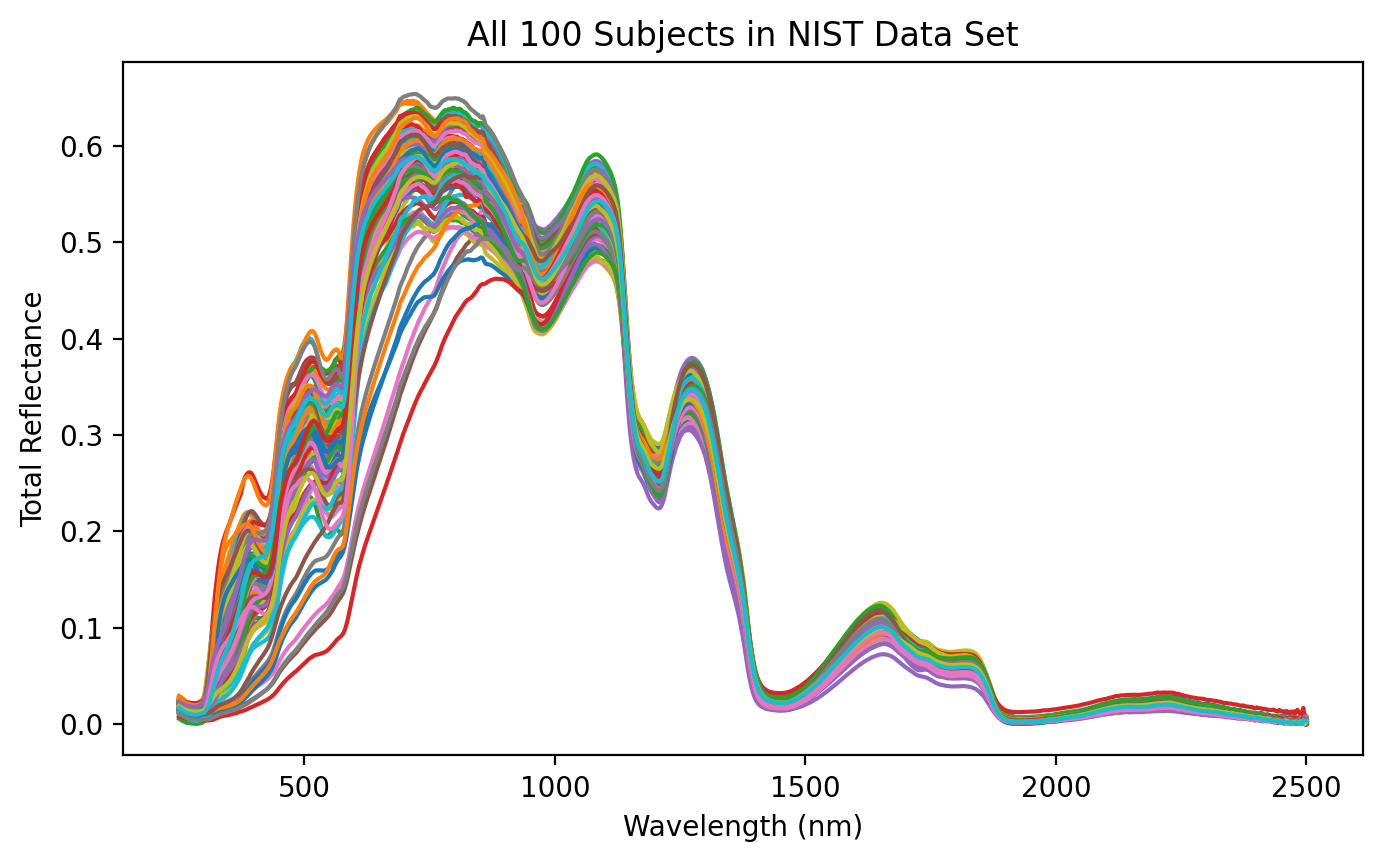

In [13]:
λ, R = iadpython.nist.all_average_reflectances()

plt.figure(figsize=(8, 4.5))
for i in range(100):
    plt.plot(λ, R[:, i] - np.min(R[:, i]))

plt.xlabel("Wavelength (nm)")
plt.ylabel("Total Reflectance")
plt.title("All 100 Subjects in NIST Data Set")
plt.show()

Since Melanin is the primary chromophore at 800nm, lets sort the subjects by to see the distribution

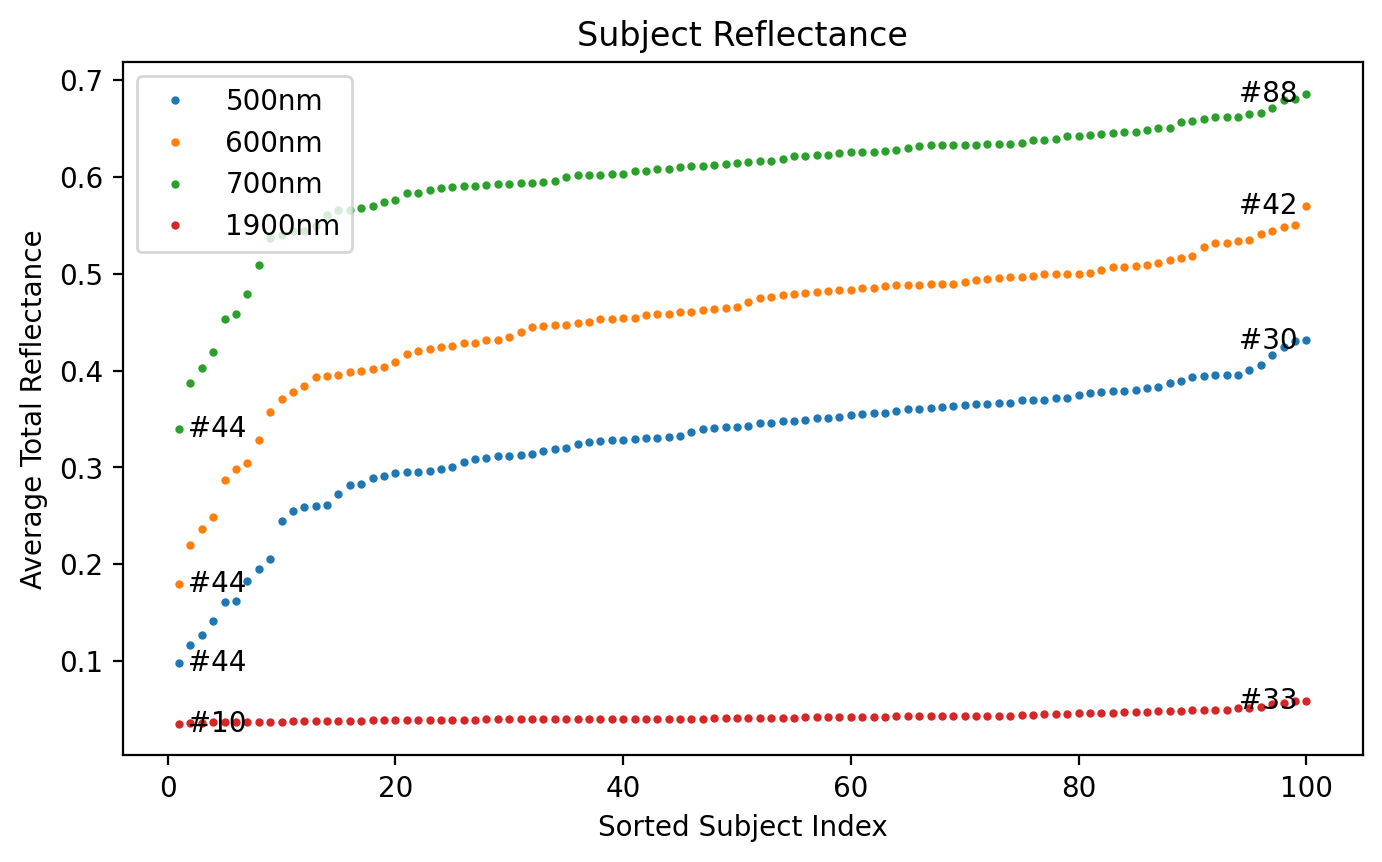

In [124]:
λ, R = iadpython.nist.all_average_reflectances()
subject_id = np.linspace(1, 100, 100, dtype=int)

plt.figure(figsize=(8, 4.5))

for lam in [500, 600, 700, 1900]:
    j = np.abs(λ - lam).argmin()
    R_near = R[j, :]
    sorted_indices = np.argsort(R_near)
    plt.plot(
        subject_id, R_near[sorted_indices], "o", markersize=2, label=(str(lam) + "nm")
    )
    first = sorted_indices[0]
    plt.text(subject_id[0], R_near[first], " #%d" % subject_id[first], va="center")
    last = sorted_indices[-1]
    plt.text(
        subject_id[-1], R_near[last], "#%d " % subject_id[last], ha="right", va="center"
    )

plt.xlabel("Sorted Subject Index")
plt.ylabel("Average Total Reflectance")
plt.title("Subject Reflectance")
plt.legend()
plt.show()

43 1.3397925274684708


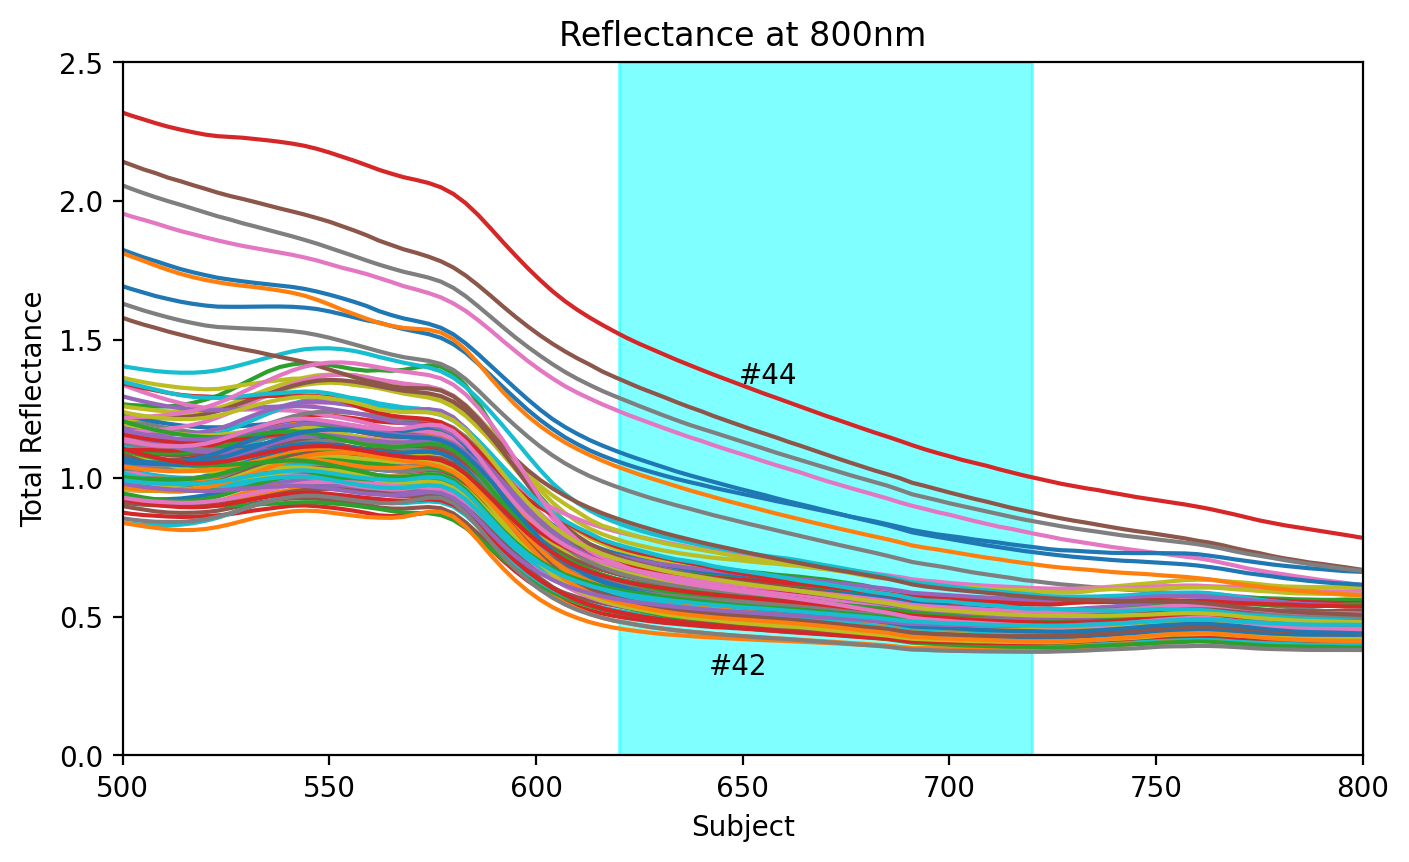

In [116]:
λ, R = iadpython.nist.all_average_reflectances()

L = -np.log(R)
j650 = np.abs(λ - 650).argmin()
L650 = L[j650, :].flatten()

id_max = L650.argmax()
id_min = L650.argmin()
print(id_max, L650[id_max])

plt.figure(figsize=(8, 4.5))
plt.plot(λ, L)

plt.xlim(500, 800)
plt.ylim(0, 2.5)
plt.axvspan(620, 720, color="cyan", alpha=0.5)

plt.xlabel("Subject")
plt.ylabel("Total Reflectance")
plt.title("Reflectance at 800nm")

plt.text(λ[j650], L650[id_max], "#%d" % (id_max + 1))
plt.text(λ[j650], L650[id_min] - 0.05, "#%d" % (id_min + 1), va="top", ha="center")

plt.show()

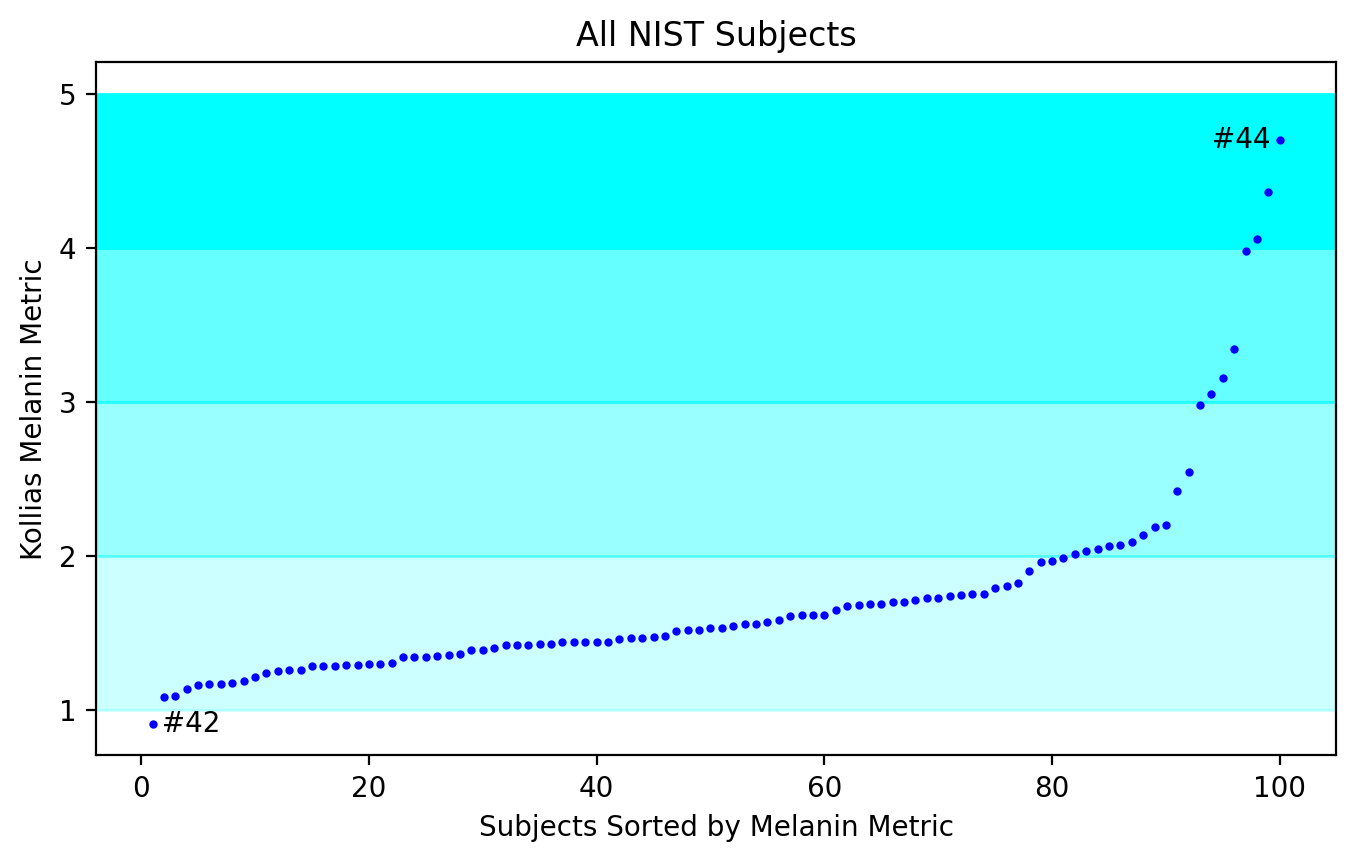

In [100]:
λ, R = iadpython.nist.all_average_reflectances()

c = np.array([])
m = np.array([])
for i in range(100):
    c1, c2 = kollias_melanin(λ, R[:, i])
    m1 = dawson_melanin(λ, R[:, i])
    c = np.append(c, c1)
    m = np.append(m, m1)

sorted_indices = np.argsort(c)
sorted_c_values = c[sorted_indices]

csort = np.sort(c)
plt.figure(figsize=(8, 4.5))
plt.title("All NIST Subjects")
plt.plot(subject_id, sorted_c_values, "bo", markersize=2)
plt.axhspan(1, 2, color="cyan", alpha=0.2)
plt.axhspan(2, 3, color="cyan", alpha=0.4)
plt.axhspan(3, 4, color="cyan", alpha=0.6)
plt.axhspan(4, 5, color="cyan", alpha=1)
plt.xlabel("Subjects Sorted by Melanin Metric")
plt.ylabel("Kollias Melanin Metric")

plt.text(
    subject_id[0],
    sorted_c_values[0],
    " #%d" % subject_id[sorted_indices[0]],
    va="center",
)
plt.text(
    subject_id[-1],
    sorted_c_values[-1],
    "#%d " % subject_id[sorted_indices[-1]],
    ha="right",
    va="center",
)
plt.show()

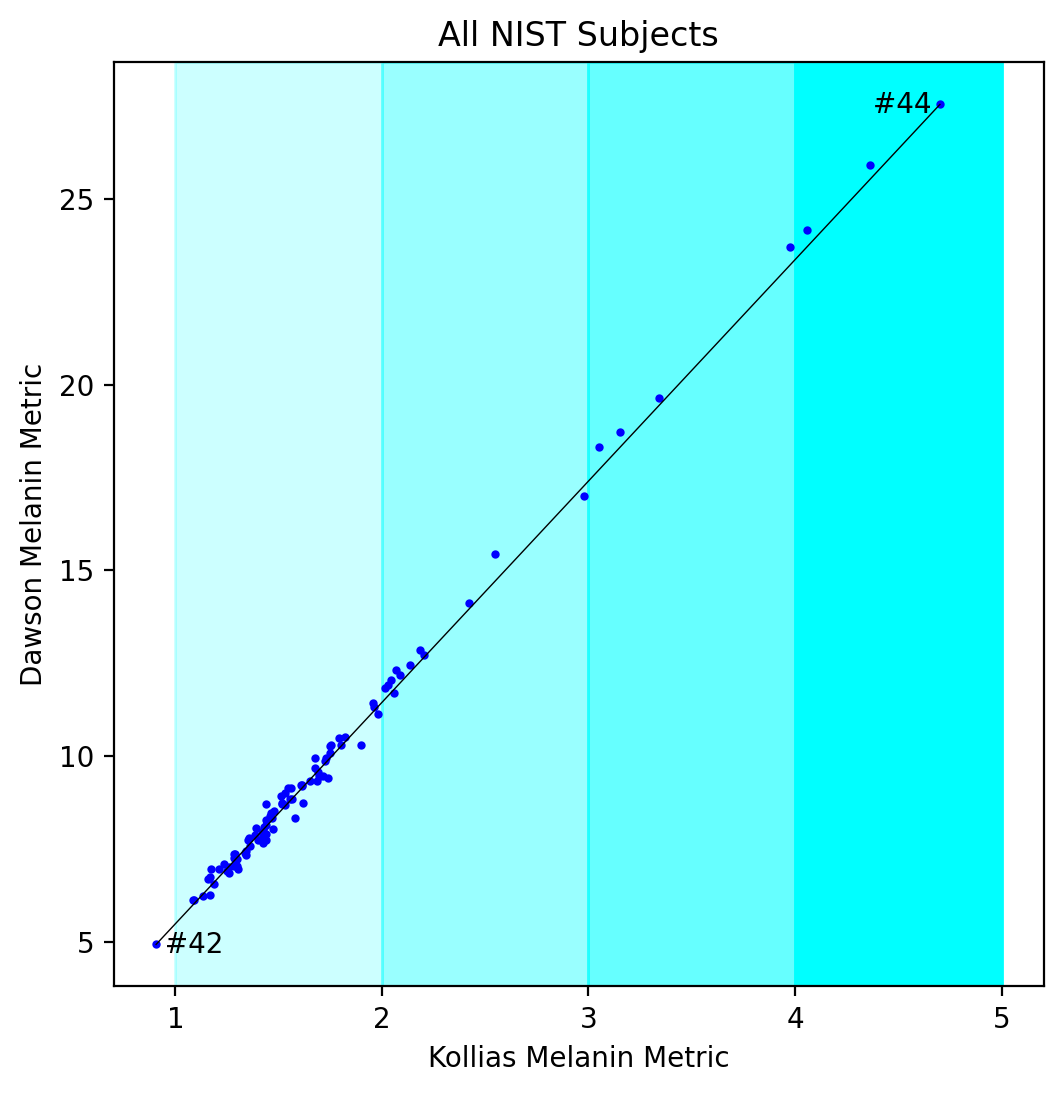

In [102]:
λ, R = iadpython.nist.all_average_reflectances()

c = np.array([])
m = np.array([])
for i in range(100):
    c1, c2 = kollias_melanin(λ, R[:, i])
    m1 = dawson_melanin(λ, R[:, i])
    c = np.append(c, c1)
    m = np.append(m, m1)

imin = np.argmin(c)
imax = np.argmax(c)
plt.figure(figsize=(6, 6))
plt.title("All NIST Subjects")
plt.plot(c, m, "bo", markersize=2)
plt.plot([c[imin], c[imax]], [m[imin], m[imax]], lw=0.5, color="black")
plt.text(c[imin], m[imin], " #%d" % subject_id[imin], ha="left", va="center")
plt.text(c[imax], m[imax], "#%d " % subject_id[imax], ha="right", va="center")
plt.axvspan(1, 2, color="cyan", alpha=0.2)
plt.axvspan(2, 3, color="cyan", alpha=0.4)
plt.axvspan(3, 4, color="cyan", alpha=0.6)
plt.axvspan(4, 5, color="cyan", alpha=1)
plt.ylabel("Dawson Melanin Metric")
plt.xlabel("Kollias Melanin Metric")
plt.show()